<a href="https://colab.research.google.com/github/yeon524/IDS/blob/main/1%2B2%ED%92%80%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:


!rm -rf openpack-dataset
!git clone https://github.com/yeon524/openpack-dataset.git -q

import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir("/content/openpack-dataset/docs/data-collection")



rows = []
with open("sessions.md", "r", encoding="utf-8") as f:
    for line in f:

        if "|" not in line:
            continue
        if "Subject" in line or "---" in line:
            continue

        parts = [c.strip() for c in line.split("|") if c.strip()]
        if not parts:
            continue


        if not parts[0].startswith("U0"):
            continue


        if len(parts) >= 7:
            rows.append(parts[:7])

df = pd.DataFrame(rows, columns=["Subject","Session","Scenario",
                                 "Duration","Periods","Start","End"])

print("Raw dataframe shape:", df.shape)
display(df.head())


Raw dataframe shape: (104, 7)


,Subject,Session,Scenario,Duration,Periods,Start,End
0,U0101,S0100,S1,35m36s,20,2021-10-14 11:25:34+09:00,2021-10-14 12:01:10+09:00
1,U0101,S0200,S1,28m54s,20,2021-10-14 13:17:42+09:00,2021-10-14 13:46:36+09:00
2,U0101,S0300,S1,28m58s,20,2021-10-14 14:09:10+09:00,2021-10-14 14:38:08+09:00
3,U0101,S0400,S1,30m55s,20,2021-10-14 14:59:48+09:00,2021-10-14 15:30:43+09:00
4,U0101,S0500,S1,27m35s,20,2021-10-14 15:54:05+09:00,2021-10-14 16:21:40+09:00


In [10]:
import os

base_url = "https://zenodo.org/record/8145223/files"

# 다운로드할 모든 파일 목록
files = [
    "preprocessed-IMU-with-operation-labels.zip",
    "U0101.zip","U0102.zip","U0103.zip","U0104.zip","U0105.zip",
    "U0106.zip","U0107.zip","U0108.zip","U0109.zip","U0110.zip","U0111.zip",
    "U0201.zip","U0202.zip","U0203.zip","U0204.zip","U0205.zip",
    "U0206.zip","U0207.zip","U0208.zip","U0209.zip","U0210.zip"
]

# 다운로드 폴더 생성
os.makedirs("openpack_raw", exist_ok=True)

# ---------- 다운로드 ----------
for f in files:
    url = f"{base_url}/{f}?download=1"
    save_path = f"openpack_raw/{f}"

    print(f"⬇️ Downloading {f} ...")
    !wget -q "{url}" -O "{save_path}"
    print(f"   ✔ Saved to {save_path}")

print("\n🎉 다운로드 완료!")

# ---------- 압축 해제 ----------
os.makedirs("openpack", exist_ok=True)

for f in files:
    zip_path = f"openpack_raw/{f}"
    if f.endswith(".zip"):
        extract_dir = f"openpack/{f.replace('.zip','')}"
        print(f"📦 Extracting {f} ...")
        !unzip -q "{zip_path}" -d "{extract_dir}"

print("\n🎉 모든 파일 다운로드 + 압축 해제 완료!")


⬇️ Downloading preprocessed-IMU-with-operation-labels.zip ...
   ✔ Saved to openpack_raw/preprocessed-IMU-with-operation-labels.zip
⬇️ Downloading U0101.zip ...
   ✔ Saved to openpack_raw/U0101.zip
⬇️ Downloading U0102.zip ...
   ✔ Saved to openpack_raw/U0102.zip
⬇️ Downloading U0103.zip ...
   ✔ Saved to openpack_raw/U0103.zip
⬇️ Downloading U0104.zip ...
   ✔ Saved to openpack_raw/U0104.zip
⬇️ Downloading U0105.zip ...
   ✔ Saved to openpack_raw/U0105.zip
⬇️ Downloading U0106.zip ...
   ✔ Saved to openpack_raw/U0106.zip
⬇️ Downloading U0107.zip ...
   ✔ Saved to openpack_raw/U0107.zip
⬇️ Downloading U0108.zip ...
   ✔ Saved to openpack_raw/U0108.zip
⬇️ Downloading U0109.zip ...
   ✔ Saved to openpack_raw/U0109.zip
⬇️ Downloading U0110.zip ...
   ✔ Saved to openpack_raw/U0110.zip
⬇️ Downloading U0111.zip ...
   ✔ Saved to openpack_raw/U0111.zip
⬇️ Downloading U0201.zip ...
   ✔ Saved to openpack_raw/U0201.zip
⬇️ Downloading U0202.zip ...
   ✔ Saved to openpack_raw/U0202.zip
⬇️ Downloa

In [12]:
import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) sessions.md에서 Subject, Session, Scenario 읽기
sessions_md_path = "/content/openpack-dataset/docs/data-collection/sessions.md"

rows = []
with open(sessions_md_path, "r", encoding="utf-8") as f:
    for line in f:
        if "|" not in line:
            continue
        if "Subject" in line or "---" in line:
            continue

        parts = [c.strip() for c in line.split("|") if c.strip()]
        if not parts:
            continue

        if not parts[0].startswith("U0"):
            continue

        rows.append(parts[:7])

sessions_df = pd.DataFrame(
    rows,
    columns=["Subject", "Session", "Scenario", "Duration", "Periods", "Start", "End"]
)

# Scenario는 S1, S2, S3, S4 같은 형식
sessions_df = sessions_df[["Subject", "Session", "Scenario"]]
sessions_df.head()


,Subject,Session,Scenario
0,U0101,S0100,S1
1,U0101,S0200,S1
2,U0101,S0300,S1
3,U0101,S0400,S1
4,U0101,S0500,S1


In [17]:
import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

# 1) sessions.md 읽어서 매핑 만들기
sessions_md_path = "/content/openpack-dataset/docs/data-collection/sessions.md"

rows = []
with open(sessions_md_path, "r", encoding="utf-8") as f:
    for line in f:
        if "|" not in line:
            continue
        if "Subject" in line or "---" in line:
            continue

        parts = [c.strip() for c in line.split("|") if c.strip()]
        if not parts:
            continue
        if not parts[0].startswith("U0"):
            continue

        rows.append(parts[:7])

sessions_df = pd.DataFrame(
    rows,
    columns=["Subject", "Session", "Scenario", "Duration", "Periods", "Start", "End"]
)[["Subject","Session","Scenario"]]

sessions_df.head()


,Subject,Session,Scenario
0,U0101,S0100,S1
1,U0101,S0200,S1
2,U0101,S0300,S1
3,U0101,S0400,S1
4,U0101,S0500,S1


In [18]:
BASE = "/content/openpack"   # zip을 풀어둔 최상위 폴더

all_rows = []

# /content/openpack/U0xx/annotation/openpack-actions/S*.csv 찾기
action_files = glob(os.path.join(BASE, "U0*", "annotation", "openpack-actions", "S*.csv"))
print("찾은 csv 개수:", len(action_files))

for fpath in action_files:
    # 예: /content/openpack/U0101/annotation/openpack-actions/S0100.csv
    parts = fpath.split(os.sep)
    subject_id = parts[-4]                          # U0101
    session_id = os.path.splitext(parts[-1])[0]     # S0100

    df = pd.read_csv(fpath)

    # start/end 없으면 스킵
    if not {"start","end"}.issubset(df.columns):
        continue

    df["Subject"] = subject_id
    df["Session"] = session_id

    df["start_dt"] = pd.to_datetime(df["start"], errors="coerce")
    df["end_dt"]   = pd.to_datetime(df["end"], errors="coerce")

    df["duration_sec"] = (df["end_dt"] - df["start_dt"]).dt.total_seconds()

    all_rows.append(df[["Subject","Session","duration_sec"]])

if not all_rows:
    raise ValueError("❌ S*.csv 파일을 하나도 못 읽었어. 경로 다시 체크해줘!")

raw = pd.concat(all_rows, ignore_index=True)
print("총 row 수:", len(raw))
print(raw.head())


찾은 csv 개수: 99
총 row 수: 51025
  Subject Session  duration_sec
0   U0209   S0200         2.221
1   U0209   S0200         0.769
2   U0209   S0200         1.053
3   U0209   S0200         3.162
4   U0209   S0200         1.054


In [19]:
# Subject + Session 기준으로 Scenario 붙이기
raw = raw.merge(sessions_df, on=["Subject","Session"], how="left")

# 1단계: 한 사람이 한 세션에서 평균 period 시간 계산
session_subject_stats = (
    raw.groupby(["Scenario","Subject","Session"])
       .agg(
           mean_period=("duration_sec","mean"),
           n_periods=("duration_sec","count")
       )
       .reset_index()
)

# 2단계: 같은 세션을 수행한 여러 사람 간 consistency
session_consistency = (
    session_subject_stats.groupby(["Scenario","Session"])
        .agg(
            n_subjects=("Subject","nunique"),
            mean_period=("mean_period","mean"),
            std_period=("mean_period","std"),
            mad_period=("mean_period", lambda x: np.mean(np.abs(x - x.mean())))
        )
        .reset_index()
)

# 최소 2명 이상 수행한 세션만
session_consistency = session_consistency[session_consistency["n_subjects"] >= 2]

print("=== Session-level consistency ===")
print(session_consistency)


=== Session-level consistency ===
   Scenario Session  n_subjects  mean_period  std_period  mad_period
4       ALL   S0100           3     2.184036    0.307805    0.232769
5       ALL   S0200           3     2.421669    0.820811    0.619845
7       ALL   S0400           5     2.426479    0.172318    0.149187
8       ALL   S0500           3     1.977543    0.398699    0.293455
9        S1   S0100          10     2.879290    0.446980    0.363966
10       S1   S0200          10     2.494681    0.515408    0.323462
11       S1   S0300          10     2.386768    0.191737    0.129440
12       S1   S0400          10     2.369842    0.204796    0.150364
13       S1   S0500           9     2.320193    0.371122    0.260934
14       S2   S0100          10     2.366732    0.238464    0.200066
15       S2   S0200           9     2.053194    0.186718    0.160747
18       S3   S0300          10     2.209528    0.261577    0.212920
19       S3   S0400           9     2.143570    0.205854    0.159590


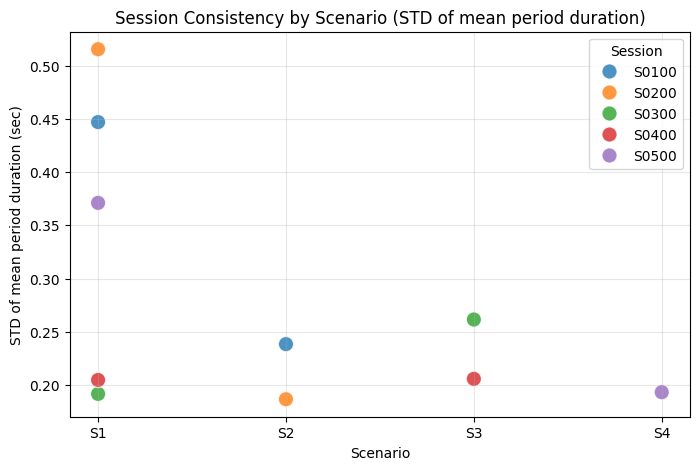

In [20]:
plot_df = session_consistency[session_consistency["Scenario"].isin(["S1","S2","S3","S4"])]

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=plot_df,
    x="Scenario",          # S1~S4
    y="std_period",        # 세션 내 사람들 평균 period 시간의 표준편차
    hue="Session",         # S0100, S0200...
    s=120,
    alpha=0.8
)

plt.title("Session Consistency by Scenario (STD of mean period duration)")
plt.xlabel("Scenario")
plt.ylabel("STD of mean period duration (sec)")
plt.grid(True, alpha=0.3)
plt.show()


In [21]:
# session_subject_stats: (Scenario, Subject, Session, mean_period, n_ops) 있었지!

# 1) 시나리오별 평균 period 시간
scenario_mean = (
    session_subject_stats.groupby("Scenario")["mean_period"]
    .mean()
    .rename("scenario_mean_period")
    .reset_index()
)

# 2) 각 Subject-Session 행에 시나리오 평균 붙이기
dev_df = session_subject_stats.merge(scenario_mean, on="Scenario", how="left")

# 3) 편차 = 개인 mean_period - 시나리오 평균
dev_df["deviation"] = dev_df["mean_period"] - dev_df["scenario_mean_period"]

dev_df.head()


,Scenario,Subject,Session,mean_period,n_periods,scenario_mean_period,deviation
0,"1,2,3,4,5,6,7,8,9,10,",U0103,S0100,2.823489,266,2.670586,0.152903
1,"1,2,3,4,5,6,7,8,9,10,",U0108,S0400,2.517683,543,2.670586,-0.152903
2,"10,11,12,13,14,15,16,17,18,19,20,",U0107,S0300,2.333562,532,2.333562,0.000000
3,"17,18,19,20,",U0109,S0100,3.024056,549,3.024056,0.000000
4,ALL,U0101,S0100,2.533189,533,2.283638,0.249551


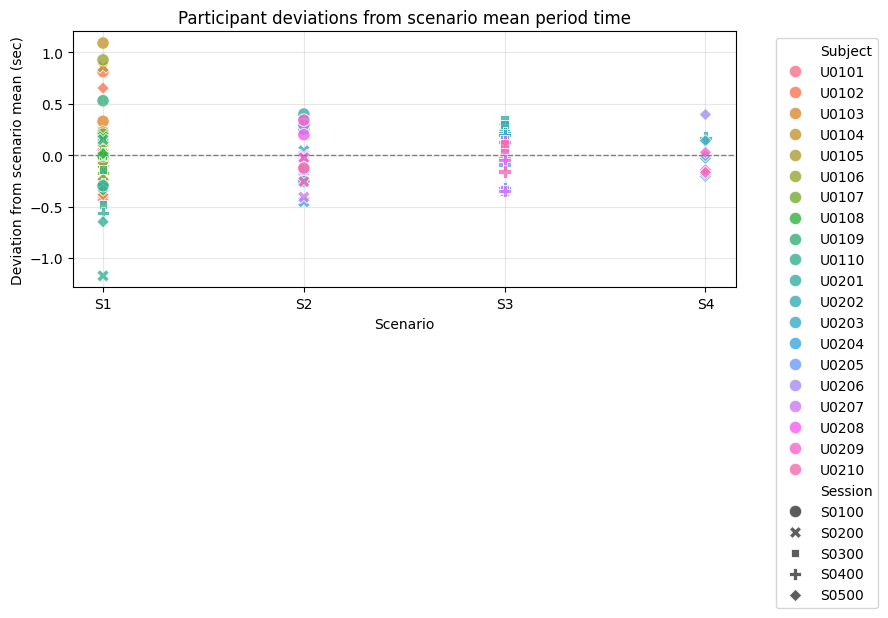

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))

sns.scatterplot(
    data=dev_df[dev_df["Scenario"].isin(["S1","S2","S3","S4"])],
    x="Scenario",
    y="deviation",
    hue="Subject",      # 참가자별로 색 다르게
    style="Session",    # 원하면 세션 모양도 다르게
    s=80,
    alpha=0.8
)

plt.axhline(0, color="gray", linestyle="--", linewidth=1)  # 시나리오 평균 기준선

plt.title("Participant deviations from scenario mean period time")
plt.xlabel("Scenario")
plt.ylabel("Deviation from scenario mean (sec)")
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")  # 범례 옆으로 빼기
plt.tight_layout()
plt.show()


In [24]:
# 참가자별 consistency: 세션 period 평균들의 표준편차
subject_consistency = (
    session_subject_stats.groupby("Subject")["mean_period"]
    .agg(
        subject_mean = "mean",
        subject_std = "std",          # ← 일관성 지표
        subject_mad = lambda x: np.mean(np.abs(x - x.mean()))
    )
    .reset_index()
)
subject_consistency.head()



,Subject,subject_mean,subject_std,subject_mad
0,U0101,2.283992,0.202844,0.174833
1,U0102,2.843907,0.368323,0.306418
2,U0103,2.438509,0.260986,0.202975
3,U0104,3.033715,0.444047,0.395559
4,U0105,2.494739,0.164502,0.140956


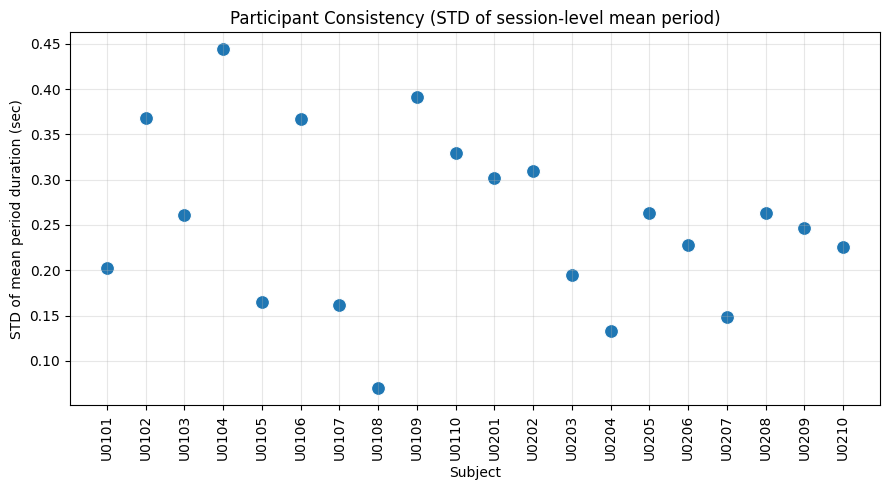

In [25]:
plt.figure(figsize=(9,5))
sns.scatterplot(
    data=subject_consistency,
    x="Subject",
    y="subject_std",
    s=100
)

plt.title("Participant Consistency (STD of session-level mean period)")
plt.ylabel("STD of mean period duration (sec)")
plt.xlabel("Subject")
plt.xticks(rotation=90)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [26]:
subj_scenario_consistency = (
    session_subject_stats.groupby(["Subject", "Scenario"])["mean_period"]
    .agg(std_period="std", mean_period="mean")
    .reset_index()
)


In [28]:
subj_scenario_consistency = (
    session_subject_stats
    .groupby(["Subject", "Scenario"])["mean_period"]
    .agg(
        std_period="std",          # 그 시나리오 안에서 이 참가자의 일관성
        mean_period="mean"
    )
    .reset_index()
)


In [29]:
subj_scenario_consistency = subj_scenario_consistency[
    subj_scenario_consistency["Scenario"].isin(["S1", "S2", "S3", "S4"])
]

# 보기 좋게 순서 고정
scenario_order = ["S1", "S2", "S3", "S4"]


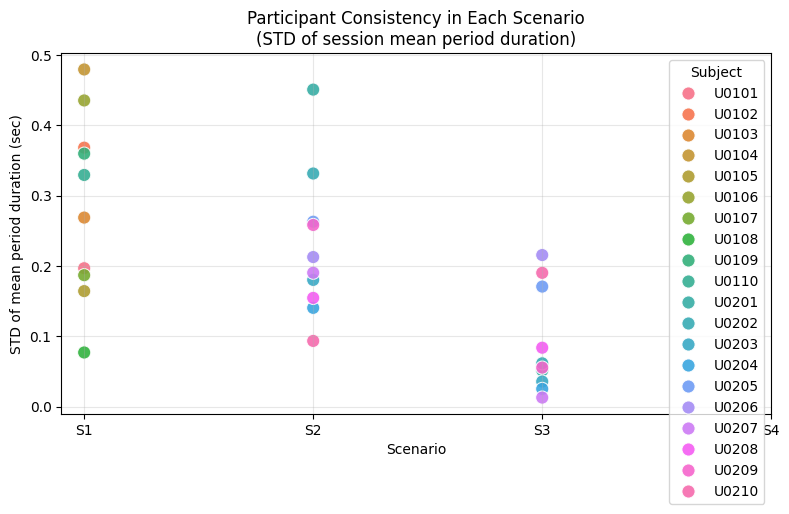

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

sns.scatterplot(
    data=subj_scenario_consistency,
    x="Scenario",
    y="std_period",
    hue="Subject",             # 참가자별 색
    s=90,
    alpha=0.9
)

plt.title("Participant Consistency in Each Scenario\n(STD of session mean period duration)")
plt.xlabel("Scenario")
plt.ylabel("STD of mean period duration (sec)")
plt.grid(alpha=0.3)
plt.xticks(scenario_order)
plt.tight_layout()
plt.show()


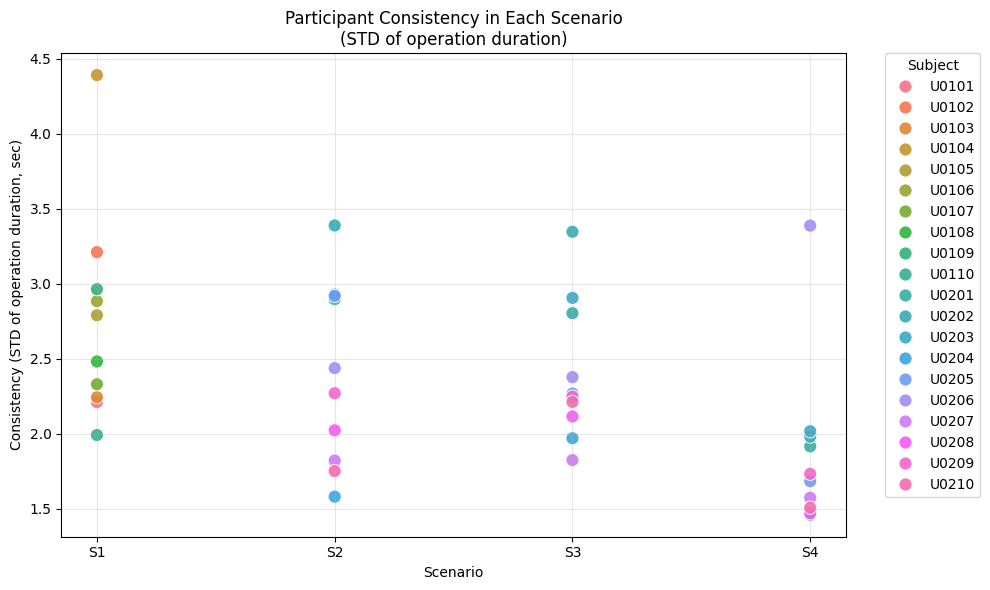

In [33]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=subj_scenario_consistency,
    x="Scenario",
    y="std_period",
    hue="Subject",
    s=90,
    alpha=0.9
)

plt.title("Participant Consistency in Each Scenario\n(STD of operation duration)")
plt.xlabel("Scenario")
plt.ylabel("Consistency (STD of operation duration, sec)")
plt.grid(alpha=0.3)
plt.xticks(["S1", "S2", "S3", "S4"])

# ⭐ Legend를 오른쪽 바깥으로 이동
plt.legend(
    title="Subject",
    bbox_to_anchor=(1.05, 1),     # 오른쪽 바깥
    loc="upper left",
    borderaxespad=0
)

plt.tight_layout()
plt.show()



===== Scenario S1 =====


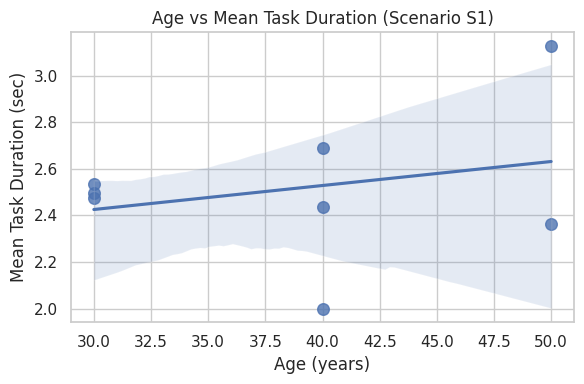

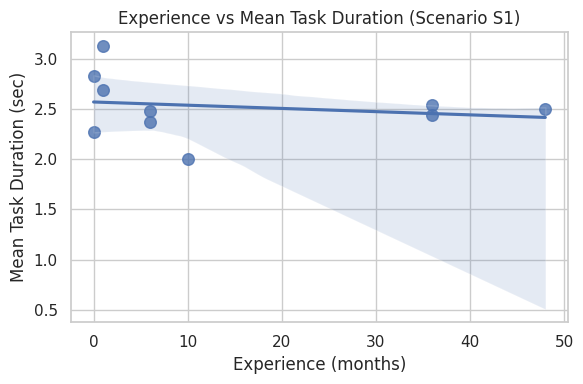

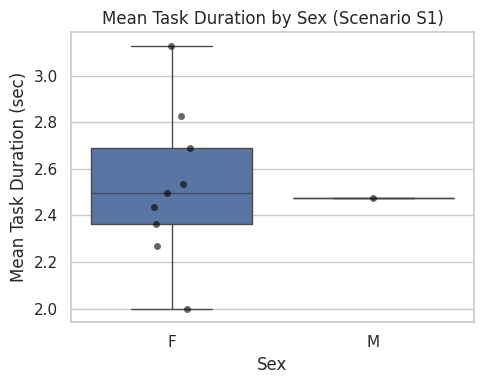

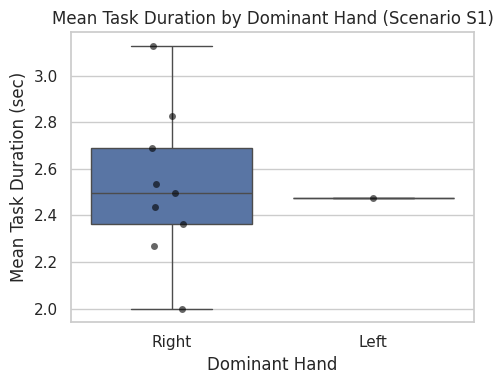


===== Scenario S2 =====


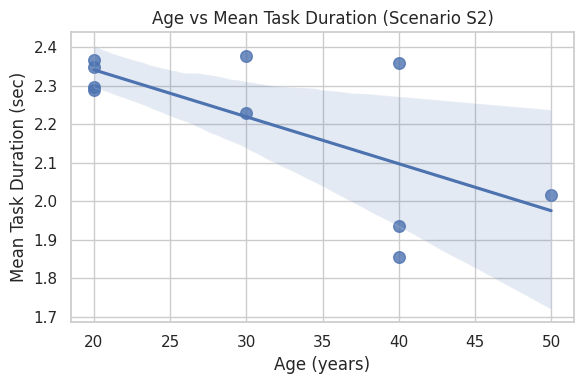

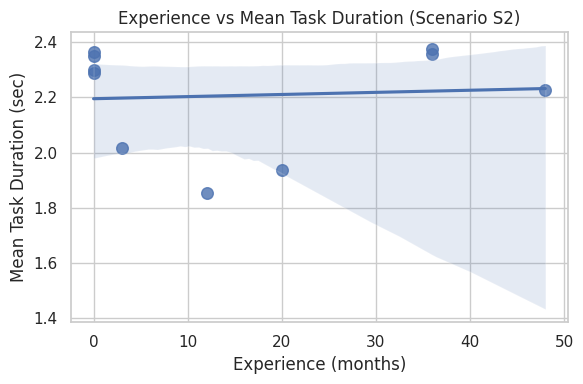

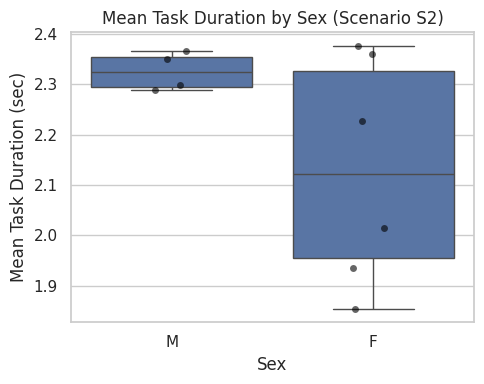

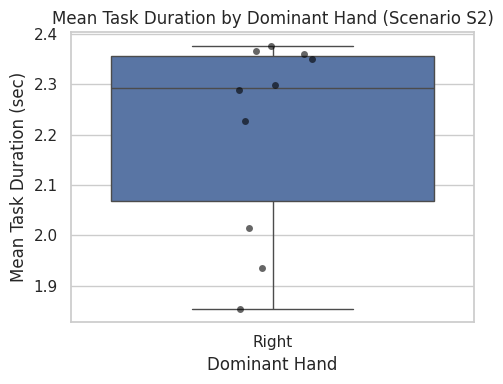


===== Scenario S3 =====


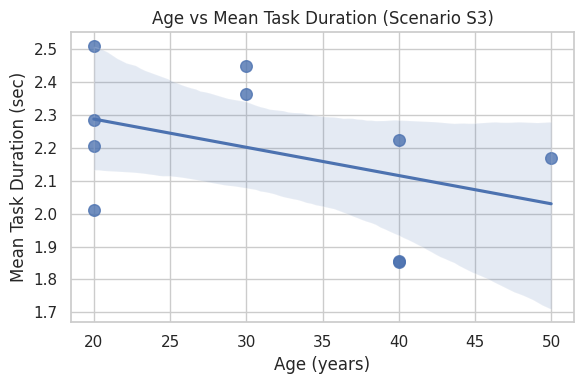

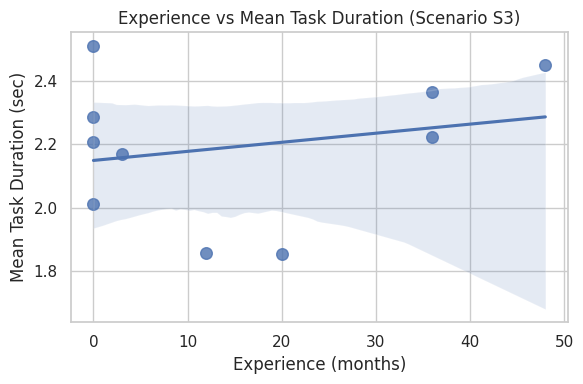

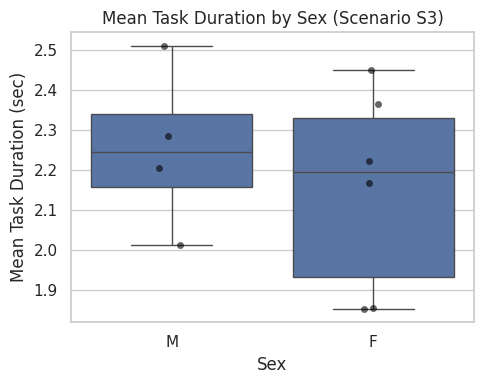

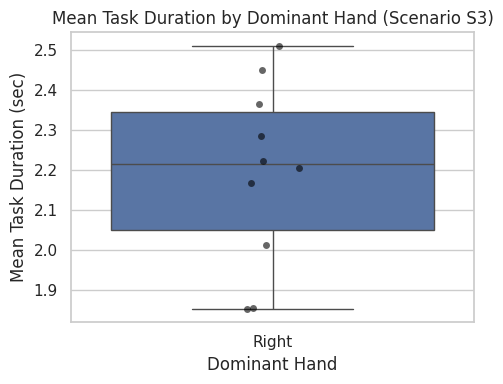


===== Scenario S4 =====


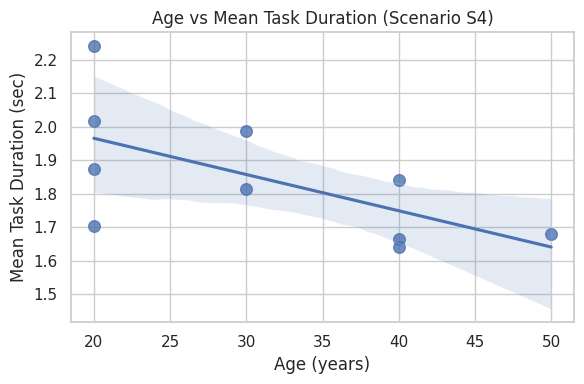

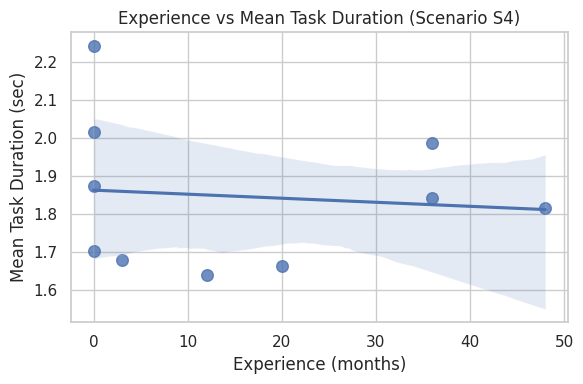

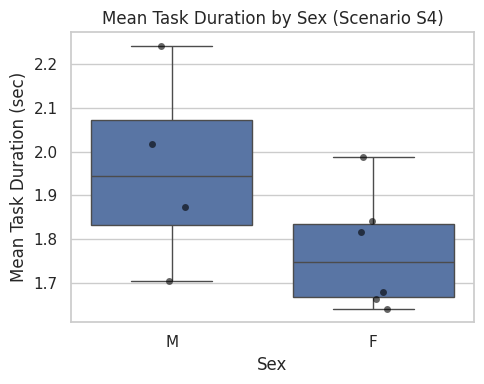

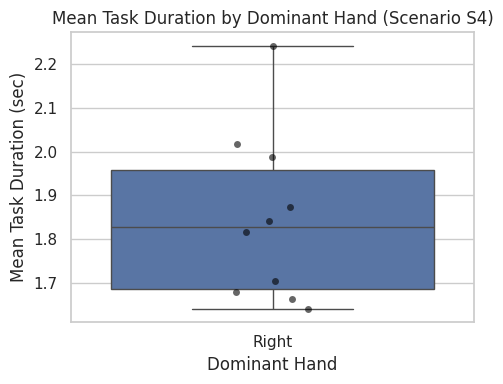

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 시나리오 목록
scenarios = ["S1", "S2", "S3", "S4"]

# 시나리오별 반복
for sc in scenarios:
    print(f"\n===== Scenario {sc} =====")

    # 1) 해당 시나리오의 참가자별 속도 계산
    scenario_perf = (
        raw[raw["Scenario"] == sc]
        .groupby("Subject")["duration_sec"]
        .agg(mean_duration="mean", std_duration="std", n_ops="count")
        .reset_index()
    )

    # 2) 사람 정보 결합
    scenario_meta = scenario_perf.merge(subjects_df, on="Subject", how="left")

    # ============================
    # (A) Age vs Duration
    # ============================
    plt.figure(figsize=(6,4))
    sns.regplot(
        data=scenario_meta,
        x="Age_num",
        y="mean_duration",
        scatter_kws={"s":70, "alpha":0.8}
    )
    plt.title(f"Age vs Mean Task Duration (Scenario {sc})")
    plt.xlabel("Age (years)")
    plt.ylabel("Mean Task Duration (sec)")
    plt.tight_layout()
    plt.show()

    # ============================
    # (B) Experience vs Duration
    # ============================
    plt.figure(figsize=(6,4))
    sns.regplot(
        data=scenario_meta,
        x="Exp_months",
        y="mean_duration",
        scatter_kws={"s":70, "alpha":0.8}
    )
    plt.title(f"Experience vs Mean Task Duration (Scenario {sc})")
    plt.xlabel("Experience (months)")
    plt.ylabel("Mean Task Duration (sec)")
    plt.tight_layout()
    plt.show()

    # ============================
    # (C) Sex vs Duration
    # ============================
    plt.figure(figsize=(5,4))
    sns.boxplot(data=scenario_meta, x="Sex", y="mean_duration")
    sns.stripplot(data=scenario_meta, x="Sex", y="mean_duration",
                  color="black", alpha=0.6)
    plt.title(f"Mean Task Duration by Sex (Scenario {sc})")
    plt.xlabel("Sex")
    plt.ylabel("Mean Task Duration (sec)")
    plt.tight_layout()
    plt.show()

    # ============================
    # (D) Dominant Hand vs Duration
    # ============================
    plt.figure(figsize=(5,4))
    sns.boxplot(data=scenario_meta, x="DominantHand", y="mean_duration")
    sns.stripplot(data=scenario_meta, x="DominantHand", y="mean_duration",
                  color="black", alpha=0.6)
    plt.title(f"Mean Task Duration by Dominant Hand (Scenario {sc})")
    plt.xlabel("Dominant Hand")
    plt.ylabel("Mean Task Duration (sec)")
    plt.tight_layout()
    plt.show()


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modeling dataset
X = perf_with_meta[["Age_num", "Exp_months", "Sex", "DominantHand"]]
y = perf_with_meta["mean_duration"]

categorical = ["Sex", "DominantHand"]
numeric = ["Age_num", "Exp_months"]

preprocess = ColumnTransformer(
    [
        ("cat", OneHotEncoder(drop="first"), categorical),
        ("num", "passthrough", numeric)
    ]
)

model = RandomForestRegressor(n_estimators=600, random_state=42)

pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", model)
])

pipe.fit(X, y)

# Extract feature names
feature_names = (
    pipe.named_steps["preprocess"]
        .transformers_[0][1]
        .get_feature_names_out(categorical).tolist()
    + numeric
)

importances = pipe.named_steps["model"].feature_importances_
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values("Importance", ascending=False)

print("\n=== Feature Importance Ranking ===")
print(importance_df)



=== Feature Importance Ranking ===
              Feature  Importance
3          Exp_months    0.527170
2             Age_num    0.405747
0               Sex_M    0.039657
1  DominantHand_Right    0.027426


/tmp/ipython-input-3523914873.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


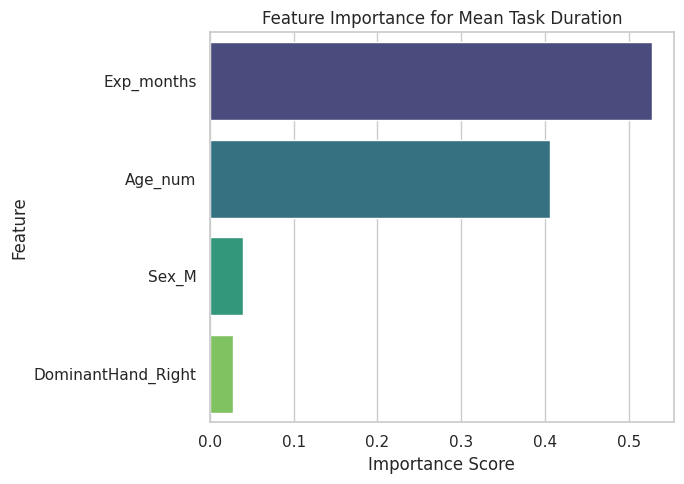

In [41]:
plt.figure(figsize=(7,5))
sns.barplot(
    data=importance_df,
    x="Importance",
    y="Feature",
    palette="viridis"
)
plt.title("Feature Importance for Mean Task Duration")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
